In [1]:
import dask
import dask.dataframe as dd
from dask.distributed import Client, progress
import dask.array as da
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler

#!pip3.7 install dask_ml
from dask_ml.model_selection import train_test_split

In [2]:

try:
    if client is not None:
        client.close()
        print("closed existing connection, ",client)       
except Exception as e:
    print(e)

name 'client' is not defined


In [3]:
client = Client(n_workers=2, threads_per_worker=2, memory_limit='8GB')
display(client)

Client Scheduler: tcp://127.0.0.1:65220 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 16.00 GB


In [4]:
dask_data = dd.read_csv('Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv', parse_dates=['Timestamp'], dtype={'TotLen Bwd Pkts': 'float64'})

In [ ]:
dask_data.head()

In [5]:
dask_data[['Pkt Len Var','Protocol']]

feature_cols = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

exlcuded_cols = ['Flow Byts/s','Flow Pkts/s','Timestamp']

X  = dask_data[feature_cols]

y = dask_data['Label']

'''
TODO: This block handles encoding of labels, use le.inverse_tranform() to decode

from dask_ml import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, shuffle=True)

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

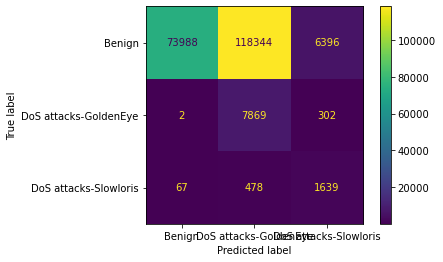

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, X_test, y_test)

In [7]:
from sklearn.cluster import KMeans


kmeans_clf = KMeans(n_clusters=3, init='k-means++')

kmeans_clf.fit_transform(X_train, y_train)

array([[1.47869312e+06, 1.90131721e+08, 1.59152809e+08],
       [4.31214266e+06, 1.90759366e+08, 1.56277223e+08],
       [5.09537387e+07, 1.68075966e+08, 1.13036317e+08],
       ...,
       [2.79464767e+06, 1.93624522e+08, 1.61545127e+08],
       [2.79279535e+06, 1.93623210e+08, 1.61542708e+08],
       [2.79361602e+06, 1.93623512e+08, 1.61544575e+08]])

In [9]:
kmeans_clf.predict(X_test.head())

array([1, 0, 0, 1, 0])